In [0]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [143]:
from sklearn import datasets
boston=datasets.load_boston()
boston.feature_names
'''here we are trying BUILDING LINEAR REGRESSION TO PREDICT HOUSING PRICE
TO DO THIS WE HAVE LOADDED BOSTON DATASET READILY AVAILABLE IN SKLEARN
we have following features which will help us determine and predict what would be the housing price based
on data given from the below input features.
CRIM     -per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's  '''

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

"here we are trying BUILDING LINEAR REGRESSION TO PREDICT HOUSING PRICE\nTO DO THIS WE HAVE LOADDED BOSTON DATASET READILY AVAILABLE IN SKLEARN\nwe have following features which will help us determine and predict what would be the housing price based\non data given from the below input features.\nCRIM     -per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO 

In [144]:
'''here we find that our dataset contains 13 features and 560 rows of data is available to us for all these input features'''
print('\n')
boston.data.shape

'here we find that our dataset contains 13 features and 560 rows of data is available to us for all these input features'

(506, 13)

In [145]:
'''here we are listing out all the input features name'''
print('\n')
boston.feature_names

'here we are listing out all the input features name'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [146]:
'''our target variable is Housing price and following are the data for Actual Housing price already available to us'''
print('\n')
boston.target

'our target variable is Housing price and following are the data for Actual Housing price already available to us'

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [147]:
'''here we created a dataframe comprising of all input features available to us'''
print('\n')
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df

'here we created a dataframe comprising of all input features available to us'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [148]:
'''here we are trying to snowball and determine first five rows of sample data available for the input features'''
print('\n')
boston_df.head()

'here we are trying to snowball and determine first five rows of sample data available for the input features'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [149]:
'''hear we added Target variable also in our dataframe and snowballing first five rows of sample data available 
for the input features as well as of the target variable'''
boston_df['House_Price']=boston.target
print('\n')
boston_df.head()

'hear we added Target variable also in our dataframe and snowballing first five rows of sample data available \nfor the input features as well as of the target variable'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [150]:
'''here we got more discriptions of the input variable and also target variable i.e. House_Price and
those desriptions are like getting mean,std devaiation,min,max,and data in 25%,50% and 75% quartile for all the listed
input features as well as the target variable'''
boston_df.describe()

'here we got more discriptions of the input variable and also target variable i.e. House_Price and\nthose desriptions are like getting mean,std devaiation,min,max,and data in 25%,50% and 75% quartile for all the listed\ninput features as well as the target variable'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [151]:
'''here we are fetermine how the input and target variables are
coorelated among themselves.we determine the strength and direction of correlation.
for example we find that LSTAT IS negatively correlated with housing price and value is -0.74
that means that for increase in LSTAT there is going to be decrease in housing price.so LSAT is
negatively coorelated with house price and coorelation strength is 0.74.'''
x=boston_df.corr()
x

'here we are fetermine how the input and target variables are\ncoorelated among themselves.we determine the strength and direction of correlation.\nfor example we find that LSTAT IS negatively correlated with housing price and value is -0.74\nthat means that for increase in LSTAT there is going to be decrease in housing price.so LSAT is\nnegatively coorelated with house price and coorelation strength is 0.74.'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


'here we plot heatmap for the coorelation between input features and target variable.\n#AS PER THE HEATMAP,PTRATIO IS -0.51 INDUS=-0.48,TAX is -0.47,LSTAT is  -0.74. SO THEY ARE  highly NEGATIVE CORRELATED \n#WITH House_price meaning with decrease in THEIR VALUES,HOUSE_PRICE INCREASES.'

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb54d59a588>)

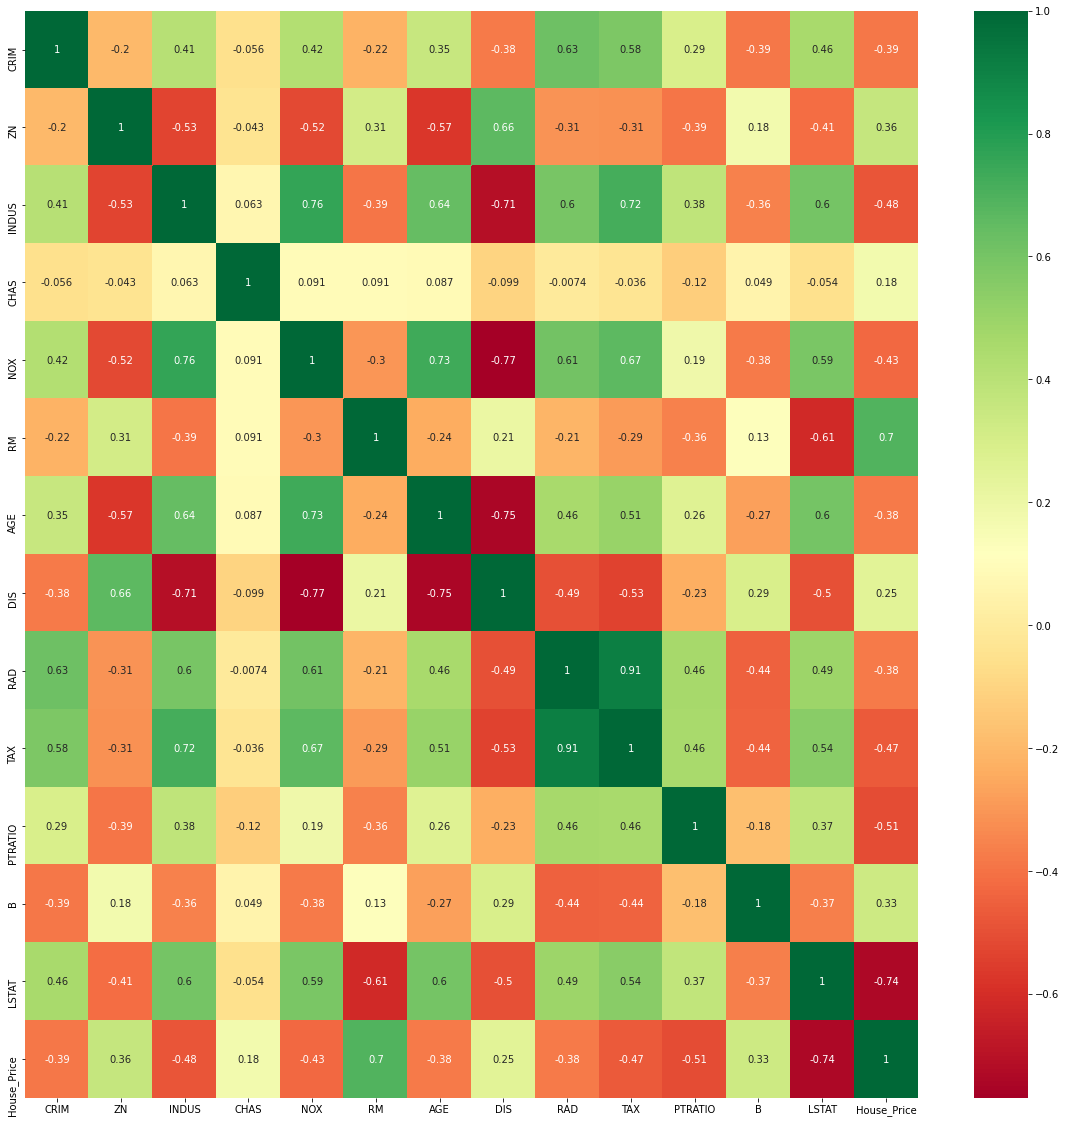

In [152]:
'''here we plot heatmap for the coorelation between input features and target variable.
#AS PER THE HEATMAP,PTRATIO IS -0.51 INDUS=-0.48,TAX is -0.47,LSTAT is  -0.74. SO THEY ARE  highly NEGATIVE CORRELATED 
#WITH House_price meaning with decrease in THEIR VALUES,HOUSE_PRICE INCREASES.'''
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show()

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb54d6c5eb8>)

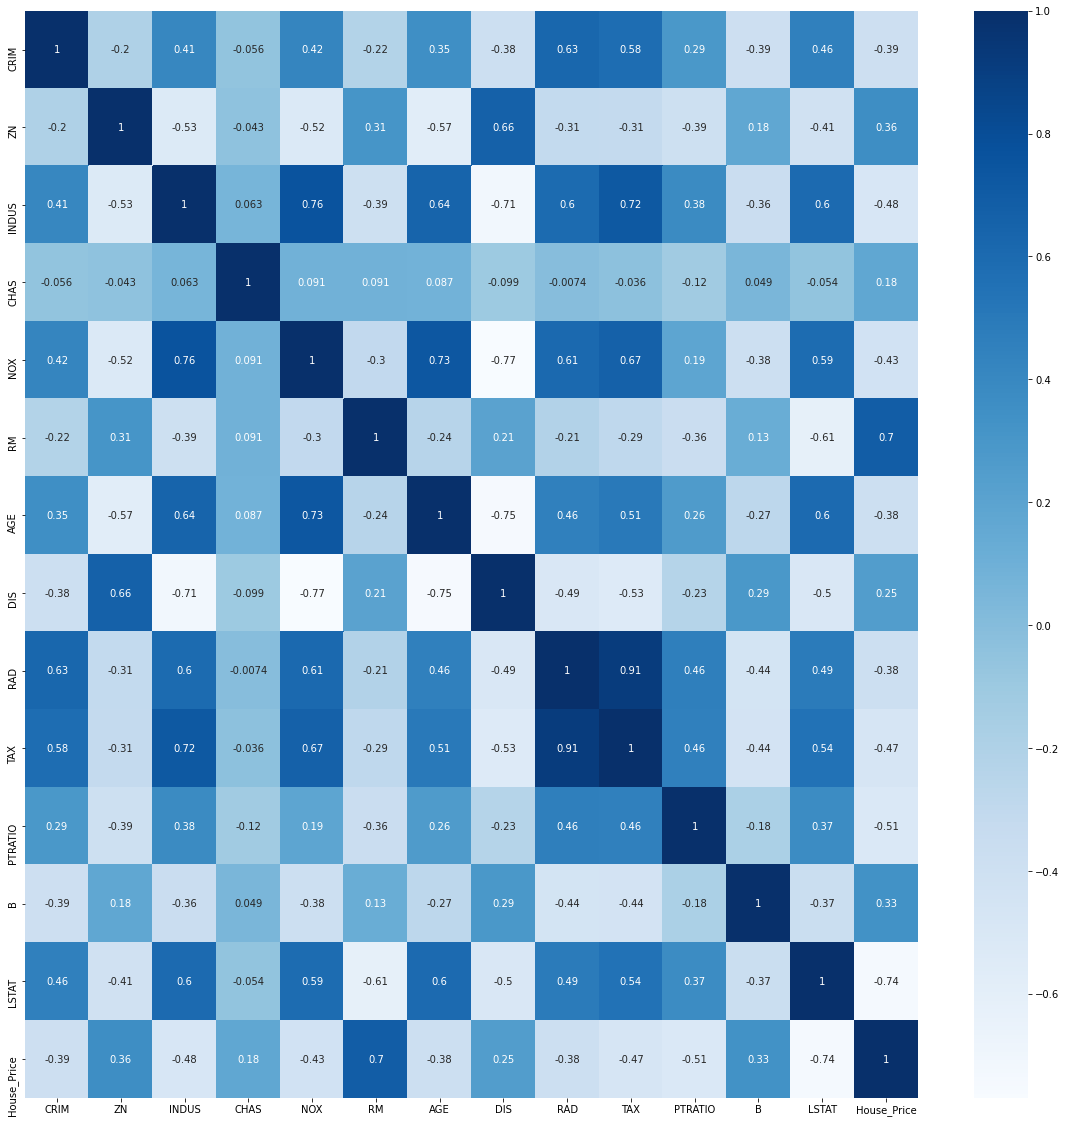

In [153]:
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='Blues',annot=True)
plt.show()

In [154]:
'''data preparation and/or cleaning operation
clearly we find that input feature CHAS has weak correlation of 0.18 and similarly DIS has weak correlation of 0.25
so we can remove these input features before building the model.'''
#STEP1=CREATE FEATURES AND LABEL
x=boston_df.drop(['CHAS','DIS','House_Price'],axis=1)
print('\n')
x.head()
y=boston_df['House_Price']
y.head()

'data preparation and/or cleaning operation\nclearly we find that input feature CHAS has weak correlation of 0.18 and similarly DIS has weak correlation of 0.25\nso we can remove these input features before building the model.'

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: House_Price, dtype: float64

In [155]:
x.shape
y.shape

(506, 11)

(506,)

In [156]:
#SCALE ALL VALUES BETWEEN 0 AND 1
#HERE WE ARE TRYING TO CONVERT UNSTANDARDIZED COEFFICIENTS TO STANDARDIZED COEFFICIENTS AND ALSO LIMITING COEFFICIENTS VALUES BETWEEN 0 AND 1
import sklearn
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x_scld.head()
x_scld.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.150206,0.658555,0.441813,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.150206,0.687105,0.528321,0.086957,0.066794,0.648936,1.000000,0.099338


,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.349167,0.521869,0.676364,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.238431,0.134627,0.289896,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.131687,0.445392,0.433831,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.314815,0.507281,0.768280,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.491770,0.586798,0.938980,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [157]:
'''STEP2 SPLIT TEST AND TRAIN
here we are creating seperate test and train samples with 25% test and 70% train samples
we will build model on train sample and evaluate the model on test sample'''
train_x,test_x,train_y,test_y=train_test_split(x_scld,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

'STEP2 SPLIT TEST AND TRAIN\nhere we are creating seperate test and train samples with 25% test and 70% train samples\nwe will build model on train sample and evaluate the model on test sample'

(379, 11)

(127, 11)

(379,)

(127,)

In [158]:
type(train_x)

pandas.core.frame.DataFrame

In [159]:
type(train_y)

pandas.core.series.Series

In [160]:
#STEP 3:CREATE INSTANT OF THE MODEL
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lm?

In [162]:

#STEP 4:FIT THE MODEL
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
#STEP5 PREDICT USING THE TRAINED MODEL
predicted_values=lm.predict(test_x)
predicted_values

array([29.5336412 , 27.58230169, 20.61861473, 22.41492046, 19.95109785,
       20.52525149, 28.13947259, 19.34127244, 22.7264299 , 25.38599744,
       28.12828099, 28.53267076, 19.86733775, 24.94076899, 23.03840341,
       20.09299449, 16.49998253, 38.0327241 , 28.54019243,  9.5109598 ,
       21.65098929, 17.87141616, 26.11205305, 25.14665072, 29.34363159,
       10.64324809, 14.04648809, 21.33377124, 35.47210997, 14.52666643,
       26.3404152 , 17.90005463, 39.27010486, 19.08663922, 23.10732596,
       17.99262948, 18.38914067, 29.45119642,  8.21138158, 21.32879432,
       24.2302001 , 23.78150418, 29.39517959, 16.06158042, 19.49595338,
       14.08940901, 38.67450474, 18.24188668, 27.09054988, 18.97070932,
       25.19606247, 26.72790448, 27.33356386, 27.64490369,  4.17826575,
       27.30896908,  9.38880425, 25.25941849, 17.55435813, 36.35046933,
       20.23053355, 27.47587765, 16.34383728, 18.19995103,  8.08459159,
       30.2500781 , 37.65026693, 25.20624099, 26.85399563, 26.38

In [164]:
#STEP6-EVALUATE MODEL PERFORMANCE
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


3.871

In [165]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),0)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


25.0

In [166]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y))

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


3.0

In [167]:
print(lm.coef_)
df_m=pd.DataFrame({'features':x_scld.columns,'coeff':lm.coef_})

[ -8.128503     0.87511848   3.65857823  -6.34943641  17.03835315
   3.66793138   7.36447978  -5.91226465 -10.88027562   2.95463795
 -21.22615166]


In [0]:
df_m=df_m.sort_values(by=['coeff'])

In [169]:
df_m

,features,coeff
10,LSTAT,-21.226152
8,PTRATIO,-10.880276
0,CRIM,-8.128503
3,NOX,-6.349436
7,TAX,-5.912265
1,ZN,0.875118
9,B,2.954638
2,INDUS,3.658578
5,AGE,3.667931
6,RAD,7.364480


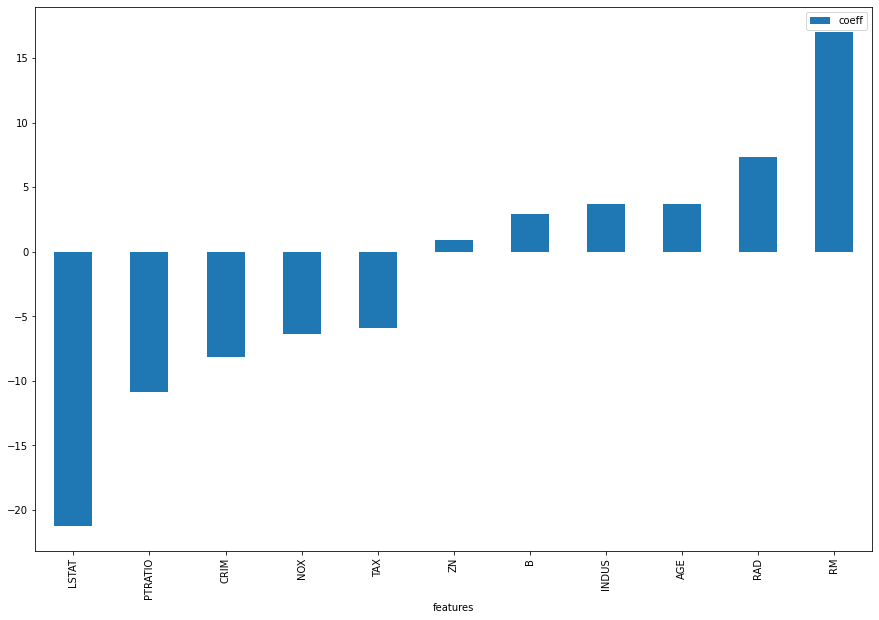

In [170]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(15,10))
plt.show();

In [171]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(lm.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

75.0

In [172]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(lm.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

68.0

In [173]:
type(pd.DataFrame({'features':x.columns,'coeff':lm.coef_}))

pandas.core.frame.DataFrame

In [174]:

#INVERSE SCALING TO REVERT BACK TO SAME SCALE
df1=pd.DataFrame(scld.inverse_transform(x_scld),columns=x.columns)
df1.head()
x.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33


In [0]:
#In the last step we are appending the predicted house prices into 
#the original data and computing the error in estimation for the test data.
fdf=pd.concat([test_x,test_y],1)

In [176]:

fdf['Predicted']=np.round(predicted_values,1)
fdf['Prediction_Error']=fdf['House_Price']-fdf['Predicted']
fdf

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,House_Price,Predicted,Prediction_Error
307,0.000483,0.330,0.063050,0.179012,0.630006,0.694130,0.260870,0.066794,0.617021,1.000000,0.160044,28.2,29.5,-1.3
343,0.000215,0.550,0.121701,0.203704,0.600690,0.550978,0.173913,0.349237,0.531915,1.000000,0.150386,23.9,27.6,-3.7
47,0.002506,0.000,0.236437,0.129630,0.473079,0.850669,0.086957,0.087786,0.563830,0.989510,0.471026,16.6,20.6,-4.0
67,0.000580,0.125,0.205645,0.049383,0.443955,0.190525,0.130435,0.301527,0.670213,0.998260,0.175773,22.0,22.4,-0.4
362,0.041271,0.000,0.646628,0.792181,0.345085,0.960865,1.000000,0.914122,0.808511,0.959378,0.233444,20.8,20.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.001361,0.000,0.236437,0.129630,0.614869,0.000000,0.086957,0.087786,0.563830,0.971027,0.085817,26.6,28.0,-1.4
361,0.043054,0.000,0.646628,0.792181,0.515424,0.908342,1.000000,0.914122,0.808511,0.883378,0.343819,19.9,20.1,-0.2
289,0.000412,0.525,0.178152,0.041152,0.575589,0.205973,0.217391,0.202290,0.425532,0.936507,0.214680,24.8,27.9,-3.1
498,0.002617,0.000,0.338343,0.411523,0.470971,0.642636,0.217391,0.389313,0.702128,1.000000,0.308775,21.2,19.5,1.7


In [177]:
'''Here we will use churn dataset to perform Logistic regression which is one of the classification 
type of Supervised Model Building procedure.'''
df=pd.read_csv("churn.csv")

'Here we will use churn dataset to perform Logistic regression which is one of the classification \ntype of Supervised Model Building procedure.'

In [178]:
'''we can find that our churn datset has 21 variables each comprising
of 7043 rows of data.This include the input features as well as the Target variable'''
print('\n')
df.shape

'we can find that our churn datset has 21 variables each comprising\nof 7043 rows of data.This include the input features as well as the Target variable'

(7043, 21)

In [179]:
type(df)

pandas.core.frame.DataFrame

In [180]:
'''hear we included Target variable also in our dataframe and snowballing first five rows of sample data available 
for the input features as well as of the target variable'''
print('\n')
df.head()

'hear we included Target variable also in our dataframe and snowballing first five rows of sample data available \nfor the input features as well as of the target variable'

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [181]:
'''hear we included Target variable also in our dataframe and snowballing last five rows of sample data available 
for the input features as well as of the target variable'''
print('\n')
df.tail()

'hear we included Target variable also in our dataframe and snowballing last five rows of sample data available \nfor the input features as well as of the target variable'

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [182]:
df.size

147903

In [183]:
'''from the below function we find that we have 21 variables and each one has 7043 rows meaning to
say that we don't have missing value for any of the variables
Churn is our target variable which is also a catigorical variable having two outcomes 
i.e. yes or no.hence by building the logistic regression 
model we will decide the precison,recall  and accuracy for churn is equal to yes
and also churn is equal to no.
here SeniorCitizen,tenure  and MonthlyCharges are all numeric variables i.e. scale features.
remaining other features are all categorical variables'''
print('\n')
df.info()

"from the below function we find that we have 20 variables and each one has 7043 rows meaning to\nsay that we don't have missing value for any of the variables\nChurn is our target variable which is also a catigorical variable having two outcomes \ni.e. yes or no.hence by building the logistic regression \nmodel we will decide the precison,recall  and accuracy for churn is equal to yes\nand also churn is equal to no.\nhere SeniorCitizen,tenure  and MonthlyCharges are all numeric variables i.e. scale features.\nremaining other features are all categorical variables"



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object

In [184]:
#here we found that none of the variables has any missing values
pd.isnull(df).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [185]:
pd.isnull(df).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [186]:
'''here we got more discriptions of the SeniorCitizen,tenure  and MonthlyCharges as they are all numeric variables i.e. scale features. and
those desriptions are like getting mean,std devaiation,min,max,and data in 25%,50% and 75% quartile for the listed
input features '''
print('\n')
df.describe()

'here we got more discriptions of the SeniorCitizen,tenure  and MonthlyCharges as they are all numeric variables i.e. scale features. and\nthose desriptions are like getting mean,std devaiation,min,max,and data in 25%,50% and 75% quartile for the listed\ninput features '

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [187]:
'''DUMMY CODING USING THE LOOP STRUCTURE here we converted yes and no to 1 and 0 
for all categorical variables including the target variable i.e. churn'''
print('\n')
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=pd.Categorical(df[col]).codes
    df.head(5)

'DUMMY CODING USING THE LOOP STRUCTURE here we converted yes and no to 1 and 0 \nfor all categorical variables including the target variable i.e. churn'

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,1,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,0,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,1,0,0,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,0,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,1,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,0,2,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,1,0,0,2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,0,2,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,1,0,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,0,2,0,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,1,0,0,2,2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,0,2,0,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,1,0,0,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,0,2,0,2,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,1,0,0,2,2,0,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,0,2,0,2,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,1,0,0,0,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,Yes,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,No,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,Yes,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,Electronic check,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,Mailed check,56.95,1889.5,No
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,Mailed check,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,No
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,No
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,No
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,Yes
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,No
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int16  
 1   gender            7043 non-null   int8   
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   int8   
 8   InternetService   7043 non-null   int8   
 9   OnlineSecurity    7043 non-null   int8   
 10  OnlineBackup      7043 non-null   int8   
 11  DeviceProtection  7043 non-null   int8   
 12  TechSupport       7043 non-null   int8   
 13  StreamingTV       7043 non-null   int8   
 14  StreamingMovies   7043 non-null   int8   
 15  Contract          7043 non-null   int8   
 16  PaperlessBilling  7043 non-null   int8   


In [189]:
'''data preparation and/or cleaning operation
clearly we find that input feature customerID and TotalCharges are irrelevant in determining
whether target variable i.e. churn will be 0 or 1
so we can remove these input features before building the model.'''
print('\n')
x=df.drop(['customerID','TotalCharges','Churn'],axis=1)
x.head()

'data preparation and/or cleaning operation\nclearly we find that input feature customerID and TotalCharges are irrelevant in determining\nwhether target variable i.e. churn will be 0 or 1\nso we can remove these input features before building the model.'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70


In [190]:
y=df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

In [192]:
#create test and train data 70% and 30% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)
train_x.shape
test_x.shape
train_x.shape
train_y.shape

(4930, 18)

(2113, 18)

(4930, 18)

(4930,)

In [0]:
#BUILD A LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)

In [194]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
log.coef_

array([[ 0.02065473,  0.21040511,  0.04477025, -0.25185287, -0.03378192,
        -1.11659143,  0.07953846,  0.27110324, -0.27666299, -0.14602112,
        -0.04057135, -0.2982555 ,  0.00136595,  0.01744049, -0.60625901,
         0.42492908,  0.07404845,  0.02800835]])

In [0]:
#FIND OUT KEY PREDICTOR OF CHURN
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)

In [197]:
coeff.columns=("variables","coeff")
coeff.sort_values("variables",ascending=True)

,variables,coeff
14,Contract,-0.606259
3,Dependents,-0.251853
10,DeviceProtection,-0.040571
7,InternetService,0.271103
17,MonthlyCharges,0.028008
6,MultipleLines,0.079538
9,OnlineBackup,-0.146021
8,OnlineSecurity,-0.276663
15,PaperlessBilling,0.424929
2,Partner,0.044770


In [198]:
#GENERATE MODEL DIAGNOSTICS
classes=log.predict(test_x)
print(classes.size)

2113


In [199]:
print("positive cases in test data:",test_y[test_y==1].shape[0])
print("Negative cases in Test Data:",test_y[test_y==0].shape[0])

positive cases in test data: 562
Negative cases in Test Data: 1551


In [200]:

#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.8007572172266919


In [201]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1551
           1       0.65      0.53      0.59       562

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [202]:
#AUC
print("AUC")
auc=metrics.roc_auc_score(test_y,classes)
auc

AUC


0.7156466612058343

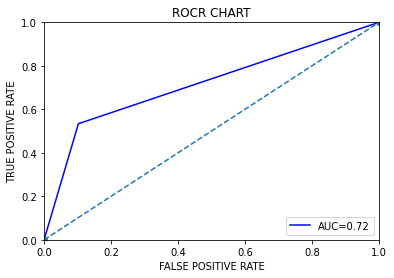

In [203]:
'''ROC CHART:from ROC CHART we find that Area under curve is 70.94% which is pretty significant'''
print('\n')
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title("ROCR CHART")
plt.plot(fpr,tpr,'b',label="AUC=%0.2F"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"o--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("TRUE POSITIVE RATE")
plt.xlabel("FALSE POSITIVE RATE")
plt.show();

CONFUSION MATRIX


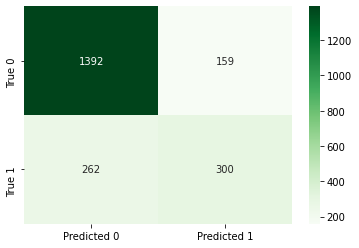

In [204]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [205]:
!jupyter nbconvert Course2_major_project.ipynb

[NbConvertApp] Converting notebook Course2_major_project.ipynb to html
[NbConvertApp] Writing 801322 bytes to Course2_major_project.html
